# Ejercicio: Representación de grafos

![Grafo](img/grafo.png)

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
print("Numpy Version:", np.__version__)
print("Seaborn Version:", sns.__version__)
print("Networkx Version:", nx.__version__)

Numpy Version: 1.14.3
Seaborn Version: 0.8.1
Networkx Version: 2.1


# Lista de Aristas

* (0, 2)
* (1, 3)
* (2, 3)
* (2, 4)
* (3, 5)
* (4, 5)

In [3]:
edge_list = [[0, 2],
             [1, 3],
             [2, 3],
             [2, 4],
             [3, 5],
             [4, 5]
            ]

edge_list

[[0, 2], [1, 3], [2, 3], [2, 4], [3, 5], [4, 5]]

In [4]:
# Grafo dirijido

my_graph = nx.DiGraph()

In [5]:
my_graph.add_edges_from(edge_list)

In [6]:
display(my_graph.nodes)
display(my_graph.edges)

NodeView((0, 2, 1, 3, 4, 5))

OutEdgeView([(0, 2), (2, 3), (2, 4), (1, 3), (3, 5), (4, 5)])

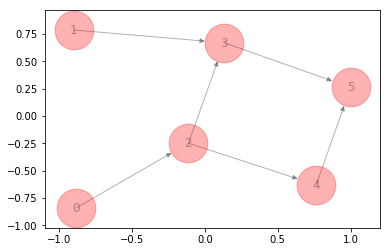

In [7]:
#nx.draw(my_graph)
nx.draw_networkx(my_graph, with_labels=True, node_size=1500, alpha=0.3, arrows=True)

# Matriz de Adyacencia


-     | **0** | **1** | **2** | **3** | **4** | **5** |
------|-------|-------|-------|-------|-------|-------|
**0** |   0   |   0   |   1   |   0   |   0   |   0   |
**1** |   0   |   0   |   0   |   1   |   0   |   0   |
**2** |   0   |   0   |   0   |   1   |   1   |   0   |
**3** |   0   |   0   |   0   |   0   |   0   |   1   |
**4** |   0   |   0   |   0   |   0   |   0   |   1   |
**5** |   0   |   0   |   0   |   0   |   0   |   0   |

In [8]:
m = np.matrix([[0, 0, 1, 0, 0, 0],
               [0, 0, 0, 1, 0, 0],
               [0, 0, 0, 1, 1, 0],
               [0, 0, 0, 0, 0, 1],
               [0, 0, 0, 0, 0, 1],
               [0, 0, 0, 0, 0, 0]])

m

matrix([[0, 0, 1, 0, 0, 0],
        [0, 0, 0, 1, 0, 0],
        [0, 0, 0, 1, 1, 0],
        [0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0]])

In [9]:
G = nx.from_numpy_array(m)
G.edges

EdgeView([(0, 2), (1, 3), (2, 3), (2, 4), (3, 5), (4, 5)])

In [10]:
# Adjacency matrix representation of G (sparse matrix).

adj_matrix = nx.adjacency_matrix(my_graph, nodelist=[0, 1, 2, 3, 4, 5])
print(adj_matrix)

  (0, 2)	1
  (1, 3)	1
  (2, 3)	1
  (2, 4)	1
  (3, 5)	1
  (4, 5)	1


In [11]:
# Return the graph adjacency matrix as a NumPy matrix.

adj_matrix = nx.to_numpy_matrix(my_graph, nodelist=[0, 1, 2, 3, 4, 5])
print(adj_matrix)

[[0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0.]]


Text(0.5,1,'Matriz de Adyacencia')

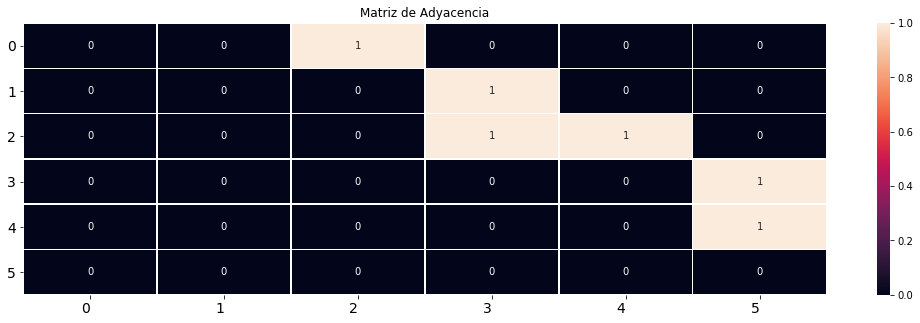

In [12]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(18, 5))
heatmap1 = sns.heatmap(adj_matrix, annot=True, linewidths=.5, ax=ax)
heatmap1.yaxis.set_ticklabels(heatmap1.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap1.xaxis.set_ticklabels(heatmap1.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap1.set_title("Matriz de Adyacencia")

# Lista de Adyacencia

* 0 $\longrightarrow$ 2 
* 1 $\longrightarrow$ 3
* 2 $\longrightarrow$ 3, 4
* 3 $\longrightarrow$ 5
* 4 $\longrightarrow$ 5
* 5 $\longrightarrow$

In [13]:
list(my_graph.adjacency())

[(0, {2: {}}),
 (2, {3: {}, 4: {}}),
 (1, {3: {}}),
 (3, {5: {}}),
 (4, {5: {}}),
 (5, {})]

In [14]:
adj_list = []
for n, nbrdict in my_graph.adjacency():
    nbr_list = list(nbrdict.keys())
    adj_list.append((n, nbr_list))
    print("{} ---> {}".format(n, nbr_list))

0 ---> [2]
2 ---> [3, 4]
1 ---> [3]
3 ---> [5]
4 ---> [5]
5 ---> []


In [15]:
adj_list

[(0, [2]), (2, [3, 4]), (1, [3]), (3, [5]), (4, [5]), (5, [])]